<a href="https://colab.research.google.com/github/apoorwagupta/Digital_Image_Processing/blob/main/DIP_ASSIGNMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APOORWA GUPTA 
# 20101212
# ECE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



Q.1 An RGB image is provided with the name “blackbuck.bmp’’. Read the image and perform
the following operations:
 o 

1.  Convert the image in grey scale and multiply each pixel values by two scalers i.e. 5 and 0.8.Obtain the image after this pixel manipulation and comment on the effect.
2.   Compute the area of black pixels and size of the image.


In [5]:
from PIL import Image
from pylab import *
from numpy import *
import cv2

In [24]:
# read image 
im = Image.open('/content/drive/MyDrive/DIPassign/blackbuck.bmp')  
print(im.mode)

RGB


L


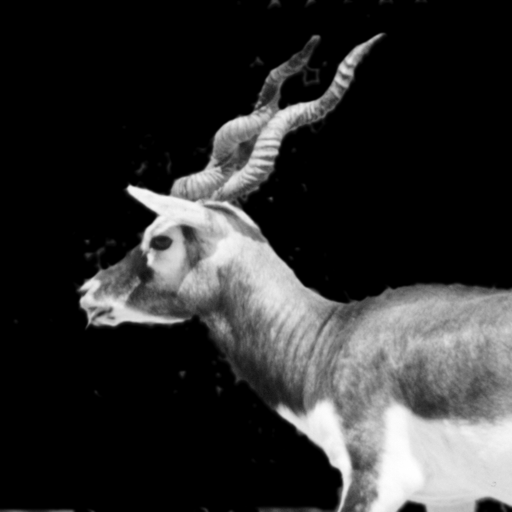

In [25]:
#convert does conversion to grayscale
imconverted = Image.open('/content/drive/MyDrive/DIPassign/blackbuck.bmp').convert('L') #grayscale (“L”) 
print(imconverted.mode)
imconverted

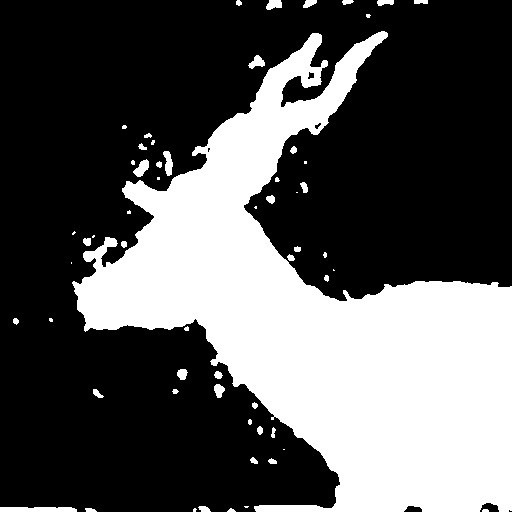

In [30]:
pixel_map = im.load() # Extracting pixel map
width, height = im.size
for i in range(imconverted.size[0]):  #for every col
    for j in range(imconverted.size[1]):   #for every row 
      r, g, b = pixel_map[i,j] #getting the pixel value.
      scaled_pixels = 0.8*5*(r + g + b)  #Applying scaling
      pixel_map[i, j] = (int(scaled_pixels), int(scaled_pixels), int(scaled_pixels))  # setting the pixel value
im

In [43]:
width, height = im.size
print(f"The width of the image is {width} pixels,and height is {height} pixels, size is {512*512}")

The width of the image is 512 pixels,and height is 512 pixels, size is 262144


In [44]:
imconverted2 = array(im.convert('L'))
blackarea = cv2.countNonZero(imconverted2)
print("The Area of Black Pixels in the image is : ",blackarea)

The Area of Black Pixels in the image is :  89980




---


Q/2. An image is provided with the name ‘’test2.jpeg’’. Improve the visual 
appearance of the image by enhancement using histogram equalization, convolutional filter and 3×3 averaging
filter. Obtain the histogram plot of both original image and filtered image for results with each
approach. Comment on the performance of each approach.

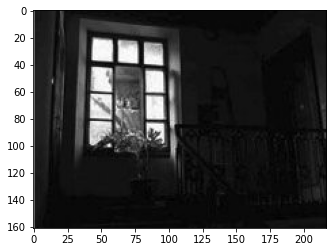

In [48]:
# im3 = array(Image.open('/content/drive/MyDrive/DIPassign/test2.jpg').convert('L'))
im3 = array(Image.open('/content/drive/MyDrive/DIPassign/test2.jpg'))
gray_im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_im3,cmap='gray')

###Histogram Equalisation

1.  First, we calculate the normalized histogram of the image. Normalization is performed by dividing the frequency of each bin by the total number of pixels in the image. As a result, the maximum value of the cumulative histogram is 1.
2. Derive intensity-mapping lookup table
3. Transform pixel intensity of the original image with the lookup table


Text(0.5, 1.0, 'After Histogram Equalisation')

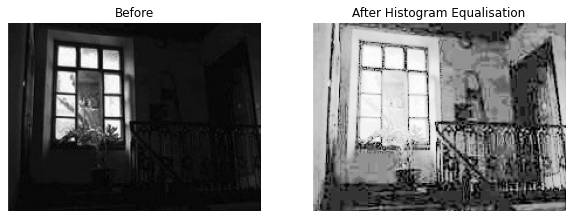

In [70]:
#convert to NumPy array
img_array = np.asarray(gray_im3)

#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)
#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels
#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)
#  Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
# Transformation
# flatten image array into 1D list
img_list = list(img_array.flatten())
# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
eq_img = Image.fromarray(eq_img_array, mode='L')
fig = plt.figure(figsize=(10, 7))
# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)
# showing image
plt.imshow(gray_im3,cmap='gray')
plt.axis('off')
plt.title("Before")

fig.add_subplot(1, 2, 2)
# showing image
plt.imshow(eq_img,cmap='gray')
plt.axis('off')
plt.title("After Histogram Equalisation")

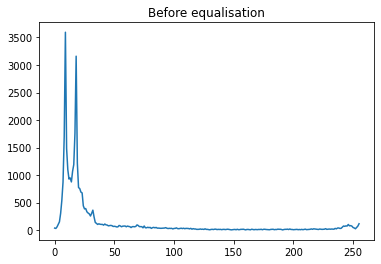

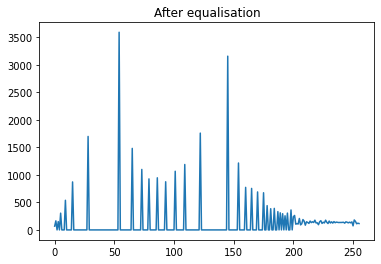

In [79]:
im4 = cv2.imread('/content/drive/MyDrive/DIPassign/test2.jpg',0)
equal = cv2.equalizeHist(array(im4))
grayHist = cv2.calcHist([im4],[0],None,[256],[0,256])
grayHist_equal = cv2.calcHist([equal],[0],None,[256],[0,256])
plt.plot(grayHist)
plt.title("Before equalisation")
plt.show()

plt.plot(grayHist_equal)
plt.title("After equalisation")
plt.show()   
  

### OBSERVATION
1. Improvement in contrast is clearly observed. 
2. After histogram equalization, the pixel intensities are distributed across the whole intensity range. 
3. The equalised histograms are increasing linearly as expected, while exhibiting staircase patternas  the pixel intensities of the original image were stretched into a wider range. 
4. This creates gaps of bins with zero frequency between adjacent non-zero bins, appearing as flat line in the cumulative histogram.

### 3X3 CONV FILTER


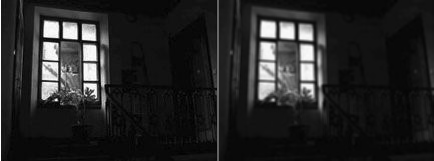

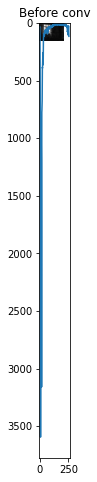

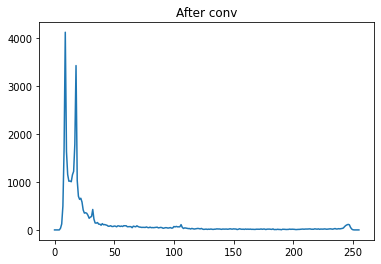

In [74]:
  image = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
  fig, ax = plt.subplots(1, figsize=(12,8))
  plt.imshow(image)
  abc=np.ones((3,3))
  kernel = np.ones((3, 3), np.float32) / 9
  image_conv = cv2.filter2D(image, -1, kernel)
  res1 = np.hstack((image, image_conv))
  cv2_imshow(res1)
  print( " ")
  hist = cv2.calcHist([image],[0],None,[256],[0,256])
  hist_conv = cv2.calcHist([image_conv],[0],None,[256],[0,256])
  
  plt.plot(hist)
  plt.title("Before conv")
  plt.show()

  plt.plot(hist_conv)
  plt.title("After conv")
  plt.show() 
 

##Observations

1. Convolution filters produce output images in which the brightness value at a 
given pixel is a function of some weighted average of the brightness of the surrounding pixels. 
2. Convolution  returns a new, spatially filtered image. 

---
Q.3 A grey scale image is provided with the name ‘’test3. Jpeg’’. Apply perwitt, sobel and
laplace filters to detect edge from the image. Also apply canny edge detection for this image and
comment on the improvement of the detection performance compared to classical approach for
the obtained results.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

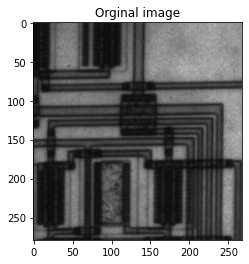

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DIPassign/test3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)  #apply gausian blur  to remove noise

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely

#Laplace 
img_laplacian = cv2.Laplacian(img_gaussian, cv2.CV_8U, ksize=5)
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

#canny

img_canny = cv2.Canny(img_gaussian,100,200)


plt.title("Orginal image")
plt.imshow(img)

### Sobel Edge Detection

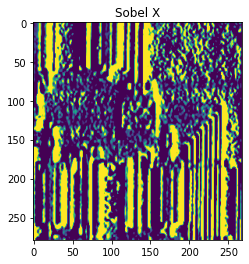

In [ ]:
plt.title("Sobel X")
plt.imshow(img_sobelx)

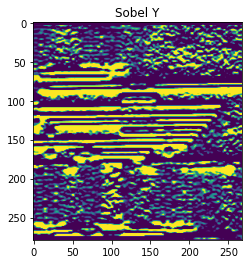

In [ ]:
plt.title("Sobel Y")
plt.imshow(img_sobely)

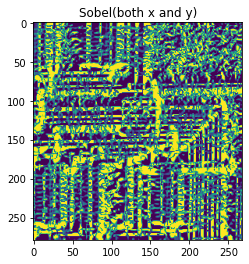

In [ ]:
plt.title("Sobel(both x and y)")
plt.imshow(img_sobel)

###Prewitt Edge Detection

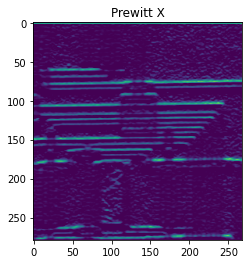

In [ ]:
plt.title("Prewitt X")
plt.imshow(img_prewittx)

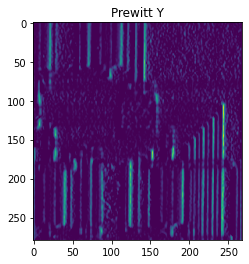

In [ ]:
plt.title("Prewitt Y")
plt.imshow(img_prewitty)

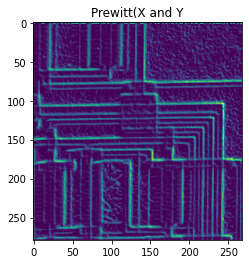

In [ ]:
plt.title("Prewitt(X and Y)")
plt.imshow(img_prewittx + img_prewitty)

### Laplace Edge Detection


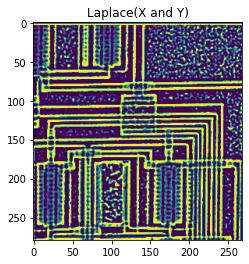

In [ ]:
plt.title("Laplace(X and Y)")
plt.imshow(img_laplacian)

### Canny Edge Detection

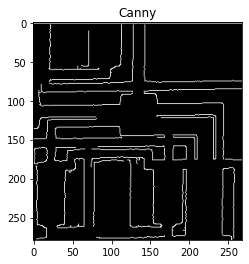

In [ ]:
plt.title("Canny")
plt.imshow(img_canny, cmap='gray')

## OBSERVATIONS

1.   The edge is smoothly detected on the image and almost no noise pixels
detect on the image while protecting the important structural
properties in an image. 
2. The canny method produces smooth and thin edges. 




---
Q.4 You will be given an image with number of objects in it. You have to count number of
objects in the image, and display a specific object as directed in the assignment.
You can assume that all objects are horizontally aligned, which means no object is vertically
below another object.
For your assignment, first of all you have to pick up the number plate at top, remove the border,
remove the IND from extreme left, and convert the characters into binary form.

You have to write code to count number of characters in the number plate , indicate the area
occupied by of each character in terms of number of black pixels on that character, and then
display a specific character say the 5 th one.



In [8]:
import cv2

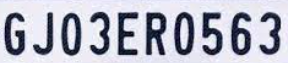

In [6]:
im4 = Image.open('/content/drive/MyDrive/DIPassign/plate.png')
im4

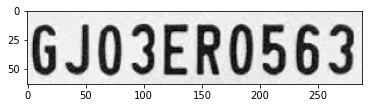

In [12]:
# Read the image and convert to grayscale
image = cv2.imread('/content/drive/MyDrive/DIPassign/plate.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

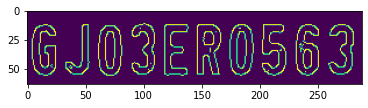

In [17]:
canny = cv2.Canny(gray, 30, 150, 3)
plt.imshow(canny)

number of characters in the image :  10


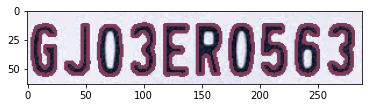

In [20]:
(count, hierarchy) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
Contouredimg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(Contouredimg, count, -1, (125, 60, 89), 2)
plt.imshow(Contouredimg)
    
print("number of characters in the image : ", len(count))




---




Q.5 Use the image given in Q.2 and perform the grey level transformation using logarithmic and
power law approach. Display the array of five results by varying the parameters in both these
images.


---



#### 1. LOG TRANSFORMATION
The log transformations can be defined by this formula

`s = c log(r + 1)`

Where s and r are the pixel values of the output and the input image and c is a constant. The value 1 is added to each of the pixel value of the input image because if there is a pixel intensity of 0 in the image, then log (0) is equal to infinity. So 1 is added, to make the minimum value at least 1.

During log transformation, the dark pixels in an image are expanded as compare to the higher pixel values. The higher pixel values are kind of compressed in log transformation. This result in following image enhancement.
#### 2. POWER LAW TRANSFORMATION 
These transformations can be given by the expression:
                           `s=cr^γ`

This symbol γ is called gamma, due to which this transformation is also known as gamma transformation.

Variation in the value of γ varies the enhancement of the images.

In [57]:
from google.colab.patches import cv2_imshow

In [80]:
#Logarithmic image transformation
def log_trans(img):
  c = 255/(np.log(1 + np.max(img)))
  log_transformed = c * np.log(1 + img)
  log_transformed = np.array(log_transformed, dtype = np.uint8)  # Specify the data type.
  plt.title("Log-transformation output image")
  plt.imshow(log_transformed,cmap = 'gray') 

 #Logarithmic image transformation
def power_trans(img):
  for gamma in [0.1, 0.4, 1.4, 2.7,3.6]: # Trying 4 gamma values.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')	# Apply gamma correction.
    print(f"Power-transformation output image, gamma = {gamma}")
    cv2_imshow(gamma_corrected)
   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


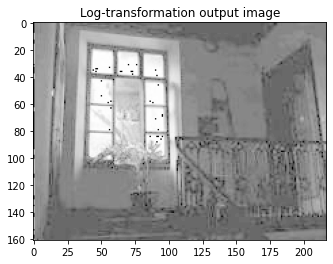

In [61]:
log_img = log_trans(gray_im3)

Power-transformation output image, gamma = 0.1


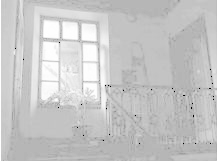

Power-transformation output image, gamma = 0.4


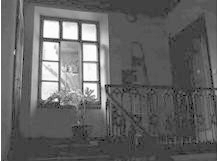

Power-transformation output image, gamma = 1.4


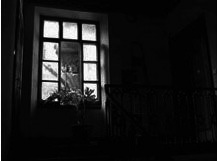

Power-transformation output image, gamma = 2.7


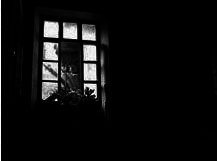

Power-transformation output image, gamma = 3.6


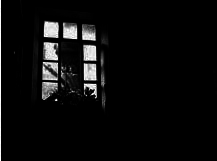

In [81]:
power_img = power_trans(gray_im3)